<a href="https://colab.research.google.com/github/choiwhmarco/COGS_181/blob/main/tinyCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## load data:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob   # for managing path name

In [ ]:
#dir of data
#place under root folder
train_images_dir ='tiny-imagenet-200/train/'
test_images_dir ='tiny-imagenet-200/test/'
val_images_dir ='tiny-imagenet-200/val/'

In [ ]:
#train label
label_fliepath='tiny-imagenet-200/wnids.txt'
file_object = open(label_fliepath,'r')
label_dict={}   # training folder
i=0
for line in file_object:
    l=line.rstrip('\n')
    label_dict[l]=i
    i=i+1
file_object.close()

In [ ]:
#train data (500 image per category, 200 categories)
traindata=np.zeros([200*500,64,64,3],dtype ='float32') # 64*64*rgb channels 
trainlabel=np.zeros([200*500,200],dtype ='float32')
for key in label_dict:
    path=glob.glob(train_images_dir+key+'/images/*.JPEG')   
    i=0
    for imageFile in path:
        img = cv2.imread(imageFile)  #bgr
        traindata[label_dict[key]*500+i]=img
        trainlabel[label_dict[key]*500+i][label_dict[key]]=1
        i=i+1

In [ ]:
#test data
testdata=np.zeros([10000,64,64,3],dtype ='float32')
path=glob.glob(test_images_dir+'images/*.JPEG')
i=0
for imageFile in path:
    img = cv2.imread(imageFile)  #bgr
    testdata[i]=img
    i=i+1    

In [ ]:
#validation label
vallabel=np.zeros([10000,200],dtype ='float32')
valpath=[None]*10000
path=val_images_dir+'/val_annotations.txt'
file_object = open(path,'r')
i=0
for line in file_object:
    l=line.split()
    valpath[i]=l[0]
    vallabel[i][label_dict[l[1]]]=1
    i=i+1
file_object.close()

In [ ]:
#val data
valdata=np.zeros([10000,64,64,3],dtype ='float32')
for i in range(10000):
    img = cv2.imread(val_images_dir+'images/'+valpath[i])  #bgr
    valdata[i]=img

## show image:

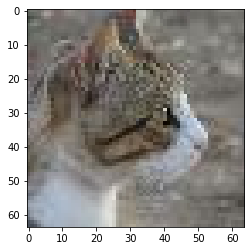

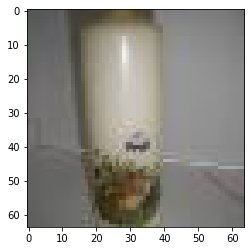

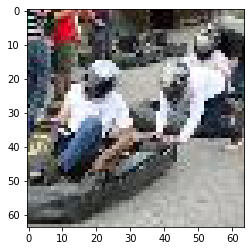

In [ ]:
plt.imshow(traindata[0][...,-1::-1]/255)
plt.show()
plt.imshow(testdata[0][...,-1::-1]/255)
plt.show()
plt.imshow(valdata[0][...,-1::-1]/255)
plt.show()

### Model to use  and Import libraries

In [ ]:
import tensorflow 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Input, Lambda
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from tensorflow.keras.optimizers import SGD,Adam
from 
import tensorflow.keras.backend as K

## Baseline e.g. LeNet:

In [ ]:
# magic
def scheduler(epoch):
    if epoch>=1:
        K.set_value(model.optimizer.lr,  0.00001)
    if epoch>=3:
        K.set_value(model.optimizer.lr,  0.0001) 
    if epoch>=5:
        K.set_value(model.optimizer.lr, 0.001) 
    if epoch>=7:
        K.set_value(model.optimizer.lr, 0.0001)     
    if epoch>=10:
        K.set_value(model.optimizer.lr, 0.00001) 
    return K.get_value(model.optimizer.lr)
reduce_lr = tensorflow.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(200, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(traindata, trainlabel, epochs=30, batch_size=64)#, callbacks=[reduce_lr]
#使用callbacks加快训练
#网络问题，前期学习率必须为1e-4或者更小，否则训练不下去，训练两个epoch后就可以提高学习率加快训练
#当然也可以不用callbacks，只是要慢慢训练
#model.fit(traindata, trainlabel, epochs=10, batch_size=64, callbacks=[reduce_lr])

Epoch 1/30
100000/100000 [==============================] - 256s 3ms/sample - loss: 4.6903 - acc: 0.0687
Epoch 2/30
100000/100000 [==============================] - 252s 3ms/sample - loss: 4.5382 - acc: 0.0862
Epoch 3/30
100000/100000 [==============================] - 248s 2ms/sample - loss: 4.3997 - acc: 0.1037
Epoch 4/30
100000/100000 [==============================] - 260s 3ms/sample - loss: 4.2719 - acc: 0.1206
Epoch 5/30
100000/100000 [==============================] - 251s 3ms/sample - loss: 4.1538 - acc: 0.1374
Epoch 6/30
100000/100000 [==============================] - 246s 2ms/sample - loss: 4.0433 - acc: 0.1522
Epoch 7/30
100000/100000 [==============================] - 240s 2ms/sample - loss: 3.9375 - acc: 0.1685
Epoch 8/30
100000/100000 [==============================] - 240s 2ms/sample - loss: 3.8360 - acc: 0.1850
Epoch 9/30
100000/100000 [==============================] - 239s 2ms/sample - loss: 3.7387 - acc: 0.2014
Epoch 10/30
100000/100000 [============================

In [ ]:
p=model.evaluate(valdata, vallabel)
print('test loss, test acc:', p)

10000/10000 [==============================] - 11s 1ms/sample - loss: 4.7093 - acc: 0.1498
test loss, test acc: [4.7092543197631835, 0.1498]


### Result from LeNet
    method:      epoch:    training accuracy: test accuracy:  
    w/  callback epoch=15  0.76               0.20  
    w/o callback epoch=10  0.1375             0.0944  
    w/o callback epoch=30  0.5382             0.1498

#### This is a baseline result.

## VGG:
#### Comparing architectures chosen VGG.

In [ ]:
K.clear_session()
tensorflow.reset_default_graph()
model = Sequential()
model.add(Conv2D(32,(3,3),strides=(1,1),input_shape=(64,64,3),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(32,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200,activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        12352     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
__________

In [ ]:
optimizer=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(traindata, trainlabel, epochs=30, batch_size=64)


Epoch 1/30
100000/100000 [==============================] - 149s 1ms/step - loss: 5.1354 - acc: 0.0118
Epoch 2/30
100000/100000 [==============================] - 143s 1ms/step - loss: 4.6588 - acc: 0.0421
Epoch 3/30
100000/100000 [==============================] - 143s 1ms/step - loss: 4.2550 - acc: 0.0817
Epoch 4/30
100000/100000 [==============================] - 143s 1ms/step - loss: 3.9673 - acc: 0.1207
Epoch 5/30
100000/100000 [==============================] - 145s 1ms/step - loss: 3.7429 - acc: 0.1542
Epoch 6/30
100000/100000 [==============================] - 145s 1ms/step - loss: 3.5317 - acc: 0.1910
Epoch 7/30
100000/100000 [==============================] - 144s 1ms/step - loss: 3.3291 - acc: 0.2257
Epoch 8/30
100000/100000 [==============================] - 146s 1ms/step - loss: 3.1625 - acc: 0.2580
Epoch 9/30
100000/100000 [==============================] - 145s 1ms/step - loss: 2.9893 - acc: 0.2883
Epoch 10/30
100000/100000 [==============================] - 144s 1ms/ste

In [ ]:
p=model.evaluate(valdata, vallabel)
print(p)

10000/10000 [==============================] - 5s 532us/step
[5.700326354980469, 0.2623]


### Result from VGG:
    method:      epoch:    training accuracy: test accuracy:   
    VGG          epoch=10  0.3216             0.2729  
    VGG          epoch=30  0.8650             0.2623

#### VGG has better performance than LeNet overall.

## Trying to vary the number of layers aka hw5:

In [ ]:
K.clear_session()
tensorflow.reset_default_graph()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(200, activation='softmax'))
model.summary()
# reference: hw5 - cnn
# 2 by 2 pooling layer caused my PC to froze becasue of too many parameters at fully connected layers.
#2x2的pooling会导致全连接层参数太多，16g的电脑跑不了。。。只能改成3x3

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2360320   
_________________________________________________________________
dense_1 (Dense)              (None, 200)               205000    
Total para

In [ ]:
optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(traindata, trainlabel, epochs=30, batch_size=64)

# since result far from ideal, so trained w/ callbacks as well.
#model.fit(traindata, trainlabel, epochs=10, batch_size=64, callbacks=[reduce_lr])
p=model.evaluate(valdata, vallabel)
print(p)

Epoch 1/30
100000/100000 [==============================] - 29s 291us/step - loss: 15.8959 - acc: 0.0093
Epoch 2/30
100000/100000 [==============================] - 29s 286us/step - loss: 15.6793 - acc: 0.0177
Epoch 3/30
100000/100000 [==============================] - 29s 286us/step - loss: 15.3384 - acc: 0.0249
Epoch 4/30
100000/100000 [==============================] - 29s 286us/step - loss: 14.2513 - acc: 0.0241
Epoch 5/30
100000/100000 [==============================] - 29s 285us/step - loss: 6.2751 - acc: 0.0115
Epoch 6/30
100000/100000 [==============================] - 29s 286us/step - loss: 5.2657 - acc: 0.0167
Epoch 7/30
100000/100000 [==============================] - 29s 286us/step - loss: 5.1532 - acc: 0.0242
Epoch 8/30
100000/100000 [==============================] - 29s 286us/step - loss: 5.0543 - acc: 0.0320
Epoch 9/30
100000/100000 [==============================] - 29s 285us/step - loss: 4.9621 - acc: 0.0401
Epoch 10/30
100000/100000 [==============================] -

### Result from Varying layers:
    method:      epoch:    training accuracy: test accuracy:  
    w/o callback epoch=10  0.0901             0.0625  
    w/o callback epoch=30  0.3654             0.1103
    w/  callback epoch=15  <0.005             <0.005   ==> ANN is useless since its less than 1/200

#### Perfomed bit worse than Baseline LeNet with 3 conv layers.
    hw5-cnn 2 conv-layers epoch=30  0.3654             0.1103
    vs.
    LeNet 3 conv-layers   epoch=30  0.5382             0.1498  <== baseline

## Trying different optimization methods e.g. Adam vs. Stocahstic Gradient Descent:

In [ ]:
K.clear_session()
tensorflow.reset_default_graph()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(200, activation='softmax'))
optimizer=SGD(lr=0.00001, momentum=0.0, decay=0.0, nesterov=False)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(traindata, trainlabel, epochs=30, batch_size=64)
p=model.evaluate(valdata, vallabel)
print(p)

Epoch 1/30
100000/100000 [==============================] - 32s 316us/step - loss: 14.3129 - acc: 0.0071
Epoch 2/30
100000/100000 [==============================] - 31s 314us/step - loss: 7.9641 - acc: 0.0065
Epoch 3/30
100000/100000 [==============================] - 31s 314us/step - loss: 5.5059 - acc: 0.0057
Epoch 4/30
100000/100000 [==============================] - 31s 313us/step - loss: 5.3904 - acc: 0.0058
Epoch 5/30
100000/100000 [==============================] - 31s 313us/step - loss: 5.3578 - acc: 0.0060
Epoch 6/30
100000/100000 [==============================] - 31s 313us/step - loss: 5.3421 - acc: 0.0064
Epoch 7/30
100000/100000 [==============================] - 31s 313us/step - loss: 5.3328 - acc: 0.0066
Epoch 8/30
100000/100000 [==============================] - 31s 313us/step - loss: 5.3267 - acc: 0.0065
Epoch 9/30
100000/100000 [==============================] - 31s 313us/step - loss: 5.3224 - acc: 0.0063
Epoch 10/30
100000/100000 [==============================] - 31

### Result for Optimizer SGD vs. Adam:
    method:      epoch:    training accuracy: test accuracy:  
    w/o callback epoch=10  0.0131             0.0114  
    w/o callback epoch=30  0.0065             0.0063

#### SGD much worse than Adam

## Trying different pooling functions e.g. Average pooling, Max pooling:

In [ ]:
K.clear_session()
tensorflow.reset_default_graph()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(200, activation='softmax'))
optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(traindata, trainlabel, epochs=30, batch_size=64)
p=model.evaluate(valdata, vallabel)
print(p)

Epoch 1/30
100000/100000 [==============================] - 37s 365us/step - loss: 7.2979 - acc: 0.0168
Epoch 2/30
100000/100000 [==============================] - 36s 358us/step - loss: 4.9930 - acc: 0.0411
Epoch 3/30
100000/100000 [==============================] - 36s 358us/step - loss: 4.7602 - acc: 0.0649
Epoch 4/30
100000/100000 [==============================] - 36s 358us/step - loss: 4.5627 - acc: 0.0882
Epoch 5/30
100000/100000 [==============================] - 36s 358us/step - loss: 4.3882 - acc: 0.1105
Epoch 6/30
100000/100000 [==============================] - 36s 358us/step - loss: 4.2368 - acc: 0.1295
Epoch 7/30
100000/100000 [==============================] - 36s 358us/step - loss: 4.1072 - acc: 0.1470
Epoch 8/30
100000/100000 [==============================] - 36s 358us/step - loss: 3.9949 - acc: 0.1638
Epoch 9/30
100000/100000 [==============================] - 36s 358us/step - loss: 3.8946 - acc: 0.1791
Epoch 10/30
100000/100000 [==============================] - 36s

### Result for Optimizer SGD vs. Adam:
    method:      epoch:    training accuracy: test accuracy:  
    w/o callback epoch=10  0.1891             0.1408 

#### AvgPooling has better test accuracy than MaxPooling
    AvgPooling   epoch=30  0.4132             0.1944
    vs.
    MaxPooling   epoch=30  0.5382             0.1498    <== baseline

## Trying to use different activation functions e.g. ReLu vs. Sigmoid.

In [ ]:
K.clear_session()
tensorflow.reset_default_graph()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(200, activation='softmax'))
optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(traindata, trainlabel, epochs=30, batch_size=64)
p=model.evaluate(valdata, vallabel)
print(p)

Epoch 1/30
100000/100000 [==============================] - 36s 360us/step - loss: 5.3152 - acc: 0.0047
Epoch 2/30
100000/100000 [==============================] - 35s 355us/step - loss: 5.3033 - acc: 0.0050
Epoch 3/30
100000/100000 [==============================] - 35s 354us/step - loss: 5.3004 - acc: 0.0052
Epoch 4/30
100000/100000 [==============================] - 35s 355us/step - loss: 5.2845 - acc: 0.0080
Epoch 5/30
100000/100000 [==============================] - 36s 355us/step - loss: 5.2091 - acc: 0.0129
Epoch 6/30
100000/100000 [==============================] - 35s 355us/step - loss: 5.1309 - acc: 0.0168
Epoch 7/30
100000/100000 [==============================] - 35s 354us/step - loss: 5.0887 - acc: 0.0203
Epoch 8/30
100000/100000 [==============================] - 35s 354us/step - loss: 5.0552 - acc: 0.0237
Epoch 9/30
100000/100000 [==============================] - 35s 355us/step - loss: 5.0162 - acc: 0.0286
Epoch 10/30
100000/100000 [==============================] - 35s

### Result for Optimizer SGD vs. Adam:
    method:      epoch:    training accuracy: test accuracy:  
    w/o callback epoch=10  0.0281             0.0264 
    w/o callback epoch=30  0.0857             0.0818

#### Sigmoid performed worse

## Trying to pre-process data by VAE vs. PCA.

### PCA:

In [ ]:
#PCA
def pca(X, d):
    # Centralization
    means = np.mean(X, 0)
    X = X - means

    # Covariance Matrix
    covM = np.dot(X.T, X)
    eigval, eigvec = np.linalg.eig(covM)
    indexes = np.argsort(eigval)[-d:]
    W = eigvec[:, indexes]
    return np.dot(X, W)

In [ ]:
# PCA to process 2d images doesn't make sense, just show effort trying here.
#图片实在太大，无法对100000个样本统一做pca，只能单张图片分别做
traindata2=np.zeros([100000,32,32])
for i in range(100000):
    traindata2[i]=pca(traindata[i].reshape(32,64*3*2),32)                
    if i%1000==0:
        print (i)

c:\python\py368\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


0
1000
2000
3000
4000
5000
6000


KeyboardInterrupt: 

In [ ]:
# PCA took too long to process. So using only 6000 images here.
K.clear_session()
tensorflow.reset_default_graph()
model = Sequential()
model.add(Flatten(input_shape=(32,32)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(200, activation='softmax'))
optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(traindata2[0:6000], trainlabel[0:6000], epochs=30, batch_size=64)

Epoch 1/30
6000/6000 [==============================] - 3s 531us/step - loss: 15.8399 - acc: 0.0163
Epoch 2/30
6000/6000 [==============================] - 3s 437us/step - loss: 15.7501 - acc: 0.0218
Epoch 3/30
6000/6000 [==============================] - 0s 71us/step - loss: 15.6265 - acc: 0.0287
Epoch 4/30
6000/6000 [==============================] - 0s 71us/step - loss: 15.5469 - acc: 0.0340
Epoch 5/30
6000/6000 [==============================] - 0s 72us/step - loss: 15.4912 - acc: 0.0383
Epoch 6/30
6000/6000 [==============================] - 0s 72us/step - loss: 15.4666 - acc: 0.0400
Epoch 7/30
6000/6000 [==============================] - 0s 71us/step - loss: 15.4126 - acc: 0.0427
Epoch 8/30
6000/6000 [==============================] - 0s 71us/step - loss: 15.3666 - acc: 0.0458
Epoch 9/30
6000/6000 [==============================] - 0s 70us/step - loss: 15.3178 - acc: 0.0488
Epoch 10/30
6000/6000 [==============================] - 0s 69us/step - loss: 15.2494 - acc: 0.0528
Epoch 1

In [ ]:
k=6000
valdata2=np.zeros([k,32,32])
for i in range(k):
    valdata2[i]=pca(valdata[i].reshape(32,64*3*2),32)                
    if i%1000==0:
        print (i)


0


c:\python\py368\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


1000
2000


KeyboardInterrupt: 

In [ ]:
p=model.evaluate(valdata2[0:2000], vallabel[0:2000])
print(p)

2000/2000 [==============================] - 0s 97us/step
[16.05098408508301, 0.004]


### Result for PCA:

## VAE:

In [ ]:
#VAE

from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.layers  import  Reshape,UpSampling2D
from tensorflow.keras.backend import set_session
K.clear_session()
tensorflow.reset_default_graph()
config = tensorflow.ConfigProto()
config.gpu_options.allow_growth = True  # GPU option
set_session(tensorflow.Session(config=config))
if 'session' in locals() and tensorflow.session is not None:
    print('Close interactive session')
    tensorflow.session.close()
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

x = Input(shape=(64,64,3))
h1=Conv2D(8, (3, 3), activation='relu',padding='same',input_shape=(64,64,3))(x)
h2=MaxPooling2D(pool_size=(4, 4))(h1)
h3=Flatten()(h2)
h = Dense(512, activation='relu')(h3)
z_mean = Dense(512)(h)
z_log_var = Dense(512)(h)

z = Lambda(sampling, output_shape=(512,))([z_mean, z_log_var])
h_decoded = Dense(512, activation='relu')(z)
h1_decoded = Dense(2048, activation='relu')(h_decoded)
h2_decoded=Reshape((16,16,8))(h1_decoded)
h3_decoded=UpSampling2D(size=(4, 4))(h2_decoded)
x_decoded_mean = Conv2D(3, (3, 3), activation='relu',padding='same')(h3_decoded)
vae = Model(x, x_decoded_mean)
encoder = Model(x, z_mean)
vae.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 8)    224         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 16, 16, 8)    0           conv2d[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 2048)         0           max_pooling2d[0][0]              
__________________________________________________________________________________________________
dense (Den

In [ ]:
def vae_loss(x, x_decoded_mean):
    xent_loss = binary_crossentropy(x, x_decoded_mean)
    xent_loss1=K.mean(K.mean(xent_loss,axis=1),axis=1)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return  xent_loss1+ kl_loss
optimizer=Adam(lr=0.000001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
vae.compile(optimizer=optimizer, loss='mse')
vae.fit(traindata[0:10000]/225,traindata[0:10000]/255,epochs=10,batch_size=50)

Epoch 1/10
10000/10000 [==============================] - 5s 503us/step - loss: 9.7708
Epoch 2/10
10000/10000 [==============================] - 4s 430us/step - loss: 9.4609
Epoch 3/10
10000/10000 [==============================] - 4s 431us/step - loss: 9.1243
Epoch 4/10
10000/10000 [==============================] - 4s 432us/step - loss: 8.7758
Epoch 5/10
10000/10000 [==============================] - 4s 431us/step - loss: 8.4291
Epoch 6/10
10000/10000 [==============================] - 4s 430us/step - loss: 8.0963
Epoch 7/10
10000/10000 [==============================] - 4s 430us/step - loss: 7.7894
Epoch 8/10
10000/10000 [==============================] - 4s 430us/step - loss: 7.4782
Epoch 9/10
10000/10000 [==============================] - 4s 431us/step - loss: 7.1917
Epoch 10/10
10000/10000 [==============================] - 4s 430us/step - loss: 6.9079


In [ ]:
trainvae = encoder.predict(traindata[0:10000]/225, batch_size=50)
valvae=encoder.predict(valdata[0:10000]/225, batch_size=50)


model = Sequential()
model.add(Dense(1024, activation='relu',input_shape=(512,)))
model.add(Dense(200, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_7 (Dense)              (None, 200)               205000    
Total params: 730,312
Trainable params: 730,312
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(trainvae, trainlabel[0:10000], epochs=30, batch_size=64)

p=model.evaluate(valvae, vallabel)
print(p)

Epoch 1/30
10000/10000 [==============================] - 1s 99us/step - loss: 4.7382 - acc: 0.0322
Epoch 2/30
10000/10000 [==============================] - 1s 60us/step - loss: 3.6582 - acc: 0.0640
Epoch 3/30
10000/10000 [==============================] - 1s 60us/step - loss: 3.2068 - acc: 0.1009
Epoch 4/30
10000/10000 [==============================] - 1s 59us/step - loss: 3.0551 - acc: 0.1192
Epoch 5/30
10000/10000 [==============================] - 1s 59us/step - loss: 2.9819 - acc: 0.1288
Epoch 6/30
10000/10000 [==============================] - 1s 60us/step - loss: 2.9363 - acc: 0.1479
Epoch 7/30
10000/10000 [==============================] - 1s 60us/step - loss: 2.9027 - acc: 0.1574
Epoch 8/30
10000/10000 [==============================] - 1s 60us/step - loss: 2.8744 - acc: 0.1665
Epoch 9/30
10000/10000 [==============================] - 1s 60us/step - loss: 2.8503 - acc: 0.1809
Epoch 10/30
10000/10000 [==============================] - 1s 60us/step - loss: 2.8294 - acc: 0.1854

总体来说，pac和vae效果不是很好，也有可能是参数设置的不好
此外，pac和vae由于需要对数据进行预处理，耗费时间更长